In [148]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import sympy as sym
from sympy import init_printing

np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

<font size= "6"> Introduction

<font size="4"> We would like to approach the problem of pricing some asset through its present value by discounting its cashflows, an industry standard technique. 

We would like to do this for some asset A, with periodic cash flows, say each year, which are growing at a rate G = (1+g) where 
0 < g < 1 and discount it at some rate R = (1+r), 0 < r < 1. 

<font size="6"> Some Math

<font size="4"> So, why do we discount? We discount a periodic payment by the rate of that period; following a very key aspect of finance: time value of money.

Cash can always be invested into something to earn a return, whether it is equities, fixed income, or a fund, meaning it is always better to have $1 now, rather than $1 in one years time, so obviously $1 in one years time, is worth less now, which can be found by discounting it at an appropriate rate.

$$
\begin{align}
p_0 = C_0 + C_1/R + ... + C_T/R^T
\end{align}
$$
<font size="4"> 
... And that actually our cash flow is growing, such that:

$$
\begin{align}
C_t = G^tC_0
\end{align}
$$

<font size="4"> So, we can compute a formula for present value.

$$
\begin{align}
p_0 = C_0 + GC_0/R + ... + G^TC_0/R^T
\end{align}
$$

$$
\begin{align}
p_0 = C_0(1+ GR^{-1} + ... + G^TR^{-T})
\end{align}
$$

<font size="4"> Since finite geometric series can be represented by:

$$
\begin{align}
1 + a + a^2 + ... + a^T = \frac{1-a^{T+1}}{1-a}
\end{align}
$$

$$
\begin{align}
p_0 = C_0(1 + (GR^{-1}) + (GR^{-1})^2 + ... + (GR^{-1})^T) = \frac{C_0(1-G^{T+1}R^{-(T+1)})}{1-{GR^{-1}}}
\end{align}
$$

<font size="4"> Now defining f1(x) as:

$$
\begin{align}
f_1(r)=(1+r)^{-(T+1)}
\end{align}
$$

<font size="4"> We may now take the nth order taylor polynomial of f1(r) around r = 0, since r is probably very close to 0.

$$
\begin{align}
f_1(0) + f_1'(0)(r) + \frac{f_1''(0)}{2}(r^2) + ... + \frac{f_1^{(n)}(0)}{n!}(r^n)
\end{align}
$$

<font size="4"> for some (k+1)th term, we have this very small term; assuming r < 1;

$$
\begin{align}
\frac{1}{k!}(r^k)
\end{align}
$$

<font size="4"> Which makes any term past the second extremely small; so can be disregarded.
Thus, we have the following approximation for f1(r):

$$
\begin{align}
f_1(r) \approx f_1(0) + f_1'(0)(r) = 1 - r(T + 1)
\end{align}
$$

<font size="4"> We do a similar process for

$$
\begin{align}
f_2(g)=(1+g)^{(T+1)}
\end{align}
$$

$$
\begin{align}
f_2(g) \approx 1 + g(T + 1)
\end{align}
$$

<font size="4"> 
So, we have the following approximation for the present value:

$$
\begin{align}
p_0 \approx C_0(T+1)(1 + \frac {rg}{r - g})
\end{align}
$$

<font size="4"> since r < 1, g < 1, rg could be small enough to simplify it even more, with a rougher approximation:

$$
\begin{align}
p_0 \approx C_0(T+1)
\end{align}
$$

<font size="6"> Coding and Testing our Approximations

<font size="4"> Now we have 3 different ways to calculate the present value; lets see how well they are. Here, c defines the first cashflow payment, C_0.

In [149]:
def true_present_value(r, g, c, T):
    R = 1 + r
    G = 1 + g
    return (c*(1 - G**(T + 1) * R**((-1) * T - 1)))/(1 - G * R**(-1))

def approximation_present_value_1(r, g, c, T):
    return c * (T + 1) * (1 + (r*g)/(r - g))

def approximation_present_value_2(r, g, c, T):
    return c * (T + 1)

functions = [true_present_value, approximation_present_value_1, approximation_present_value_2]

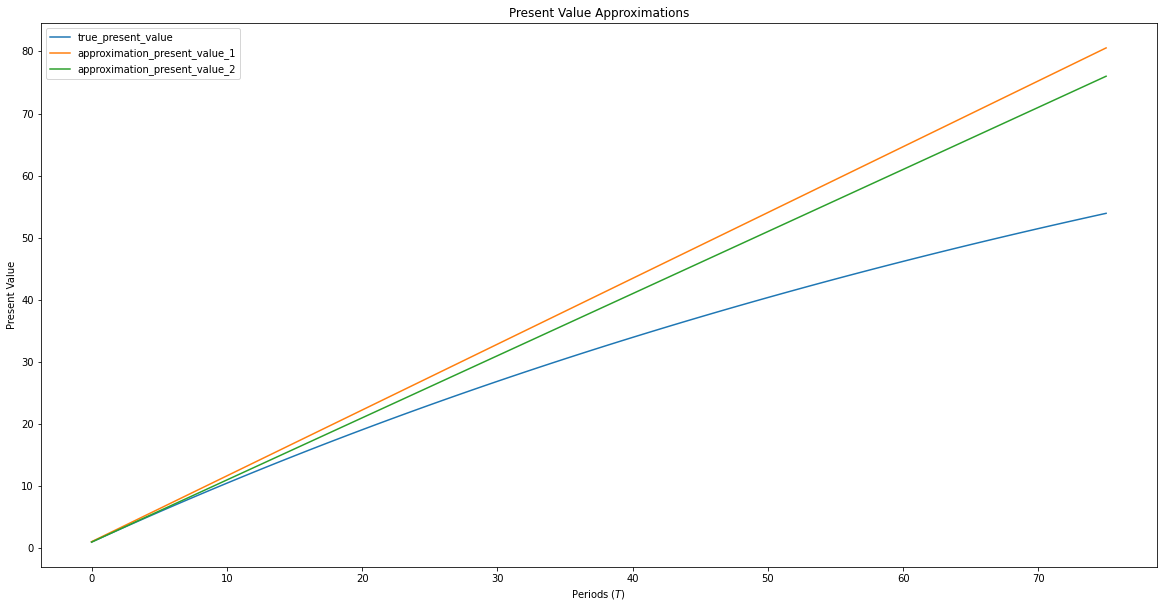

In [150]:
T = [i for i in range(0, 76)]
g = 0.02
r = 0.03
c = 1

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title("Present Value Approximations")
ax.set_xlabel("Periods ($T$)")
ax.set_ylabel("Present Value")

for f in functions:
    plt.plot(T, [f(*(r, g, c, i)) for i in T], label=f.__name__)

ax.legend()


<font size="4"> So, actually out approximations are pretty good up to around 20 time periods. Since these time periods are usually in years, 20 sounds about right. 
We can also check how our approximations vary with a changing r and g, with some 3d plots.

Text(0.5, 0.92, '3 year present value with varying $g$ and $r$')

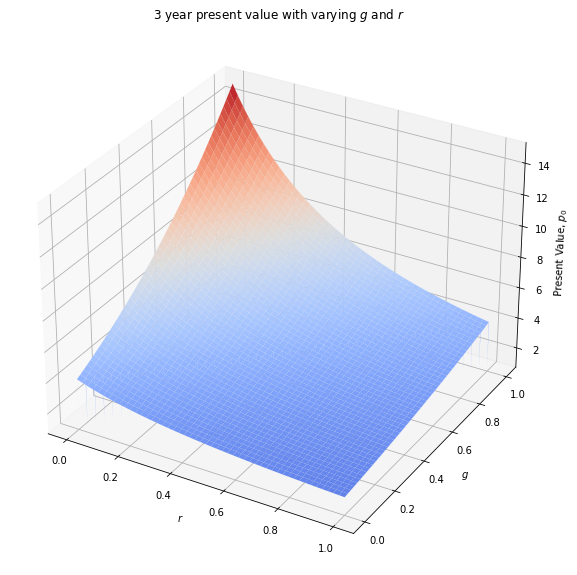

In [151]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = plt.axes(projection='3d')

r = np.linspace(0, 1, 2501)
g = np.linspace(0, 1, 2501)

X, Y = np.meshgrid(r, g)
Z = true_present_value(X, Y, 1, 3)

Z[(X == Y)] = 1

surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
    antialiased=True, clim=(0, 15))

ax.set_xlabel('$r$')
ax.set_ylabel('$g$')
ax.set_zlabel('Present Value, $p_0$')
ax.set_title('3 year present value with varying $g$ and $r$')


In [152]:
g, r, c = sym.symbols('g, r, c0')
G = (1 + g)
R = (1 + r)
p0 =  c / (1 - G * R**(-1))
init_printing(use_latex='mathjax')
print('Present Value')
p0

Present Value


     c₀    
───────────
  g + 1    
- ───── + 1
  r + 1    

In [153]:
print('Partial Derivative of p0 with Respect to g')
dp_dg = sym.diff(p0, g)
dp_dg

Partial Derivative of p0 with Respect to g


          c₀          
──────────────────────
                     2
        ⎛  g + 1    ⎞ 
(r + 1)⋅⎜- ───── + 1⎟ 
        ⎝  r + 1    ⎠ 


<font size="4"> So, our partial derivative of p0 with respect to g, is always positive, meaning, assuming r constant, increasing our g value will increase our present value; good to see the maths is consistent with the intuition.

In [154]:
print('Partial Derivative of p0 with Respect to r')
dp_dr = sym.diff(p0, r)
dp_dr

Partial Derivative of p0 with Respect to r


      -c₀⋅(g + 1)      
───────────────────────
                      2
       2 ⎛  g + 1    ⎞ 
(r + 1) ⋅⎜- ───── + 1⎟ 
         ⎝  r + 1    ⎠ 

<font size="4"> So, our partial derivative of p0 with respect to r, is always negative, meaning, assuming g constant, increasing our r value will decrease our present value; good to see the maths is consistent with the intuition.